<a href="https://colab.research.google.com/github/Sharugh/sharugh-ML-projects/blob/main/Well_Log_Data_Analysis_and_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Well Log Data Analysis and Prediction Using Machine Learning**

##Project Overview:
The goal of this project is to develop a Machine learning model that can predict key geological properties from well log data. The dataset, collected from the Kansas Geological Survey, includes measurements such as Resistivity, Spontaneous Potential, Gamma Ray, Bulk Density, Neutron, and Density Porosity across different depths. This project will involve data preprocessing, exploratory data analysis, model development using a Machine learning approach, and evaluation. The final model can be used for predictive analysis on similar datasets or further transferred to larger datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/log.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.info())

   Depth     RxoRt    RLL3       SP      RILD      MN      MI    MCAL    DCAL  \
0  195.0  226.0848  0.4076  69.8953  132.5052 -0.3548  0.1863  5.1090  1.8878   
1  195.5  223.5031  0.4063  69.2303  123.6225 -0.3619  0.1867  5.1031  1.8882   
2  196.0  221.4560  0.4047  68.4478  116.9258 -0.3668  0.1860  5.0872  1.8878   
3  196.5  219.8248  0.4033  67.4843  111.7925 -0.3613  0.1867  5.0881  1.8884   
4  197.0  218.1438  0.4023  66.3013  106.7821 -0.3569  0.1870  5.0972  1.8883   

     RHOB    RHOC     DPOR     CNLS       GR  
0  1.6973 -0.6303  59.2216  30.0657  60.4576  
1  1.6791 -0.6409  60.2877  26.7625  54.1495  
2  1.6585 -0.6539  61.4914  27.6017  51.9944  
3  1.6435 -0.6649  62.3711  31.5870  52.9645  
4  1.6390 -0.6705  62.6343  35.8251  54.9659  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8739 non-null   float64
 1   RxoRt   

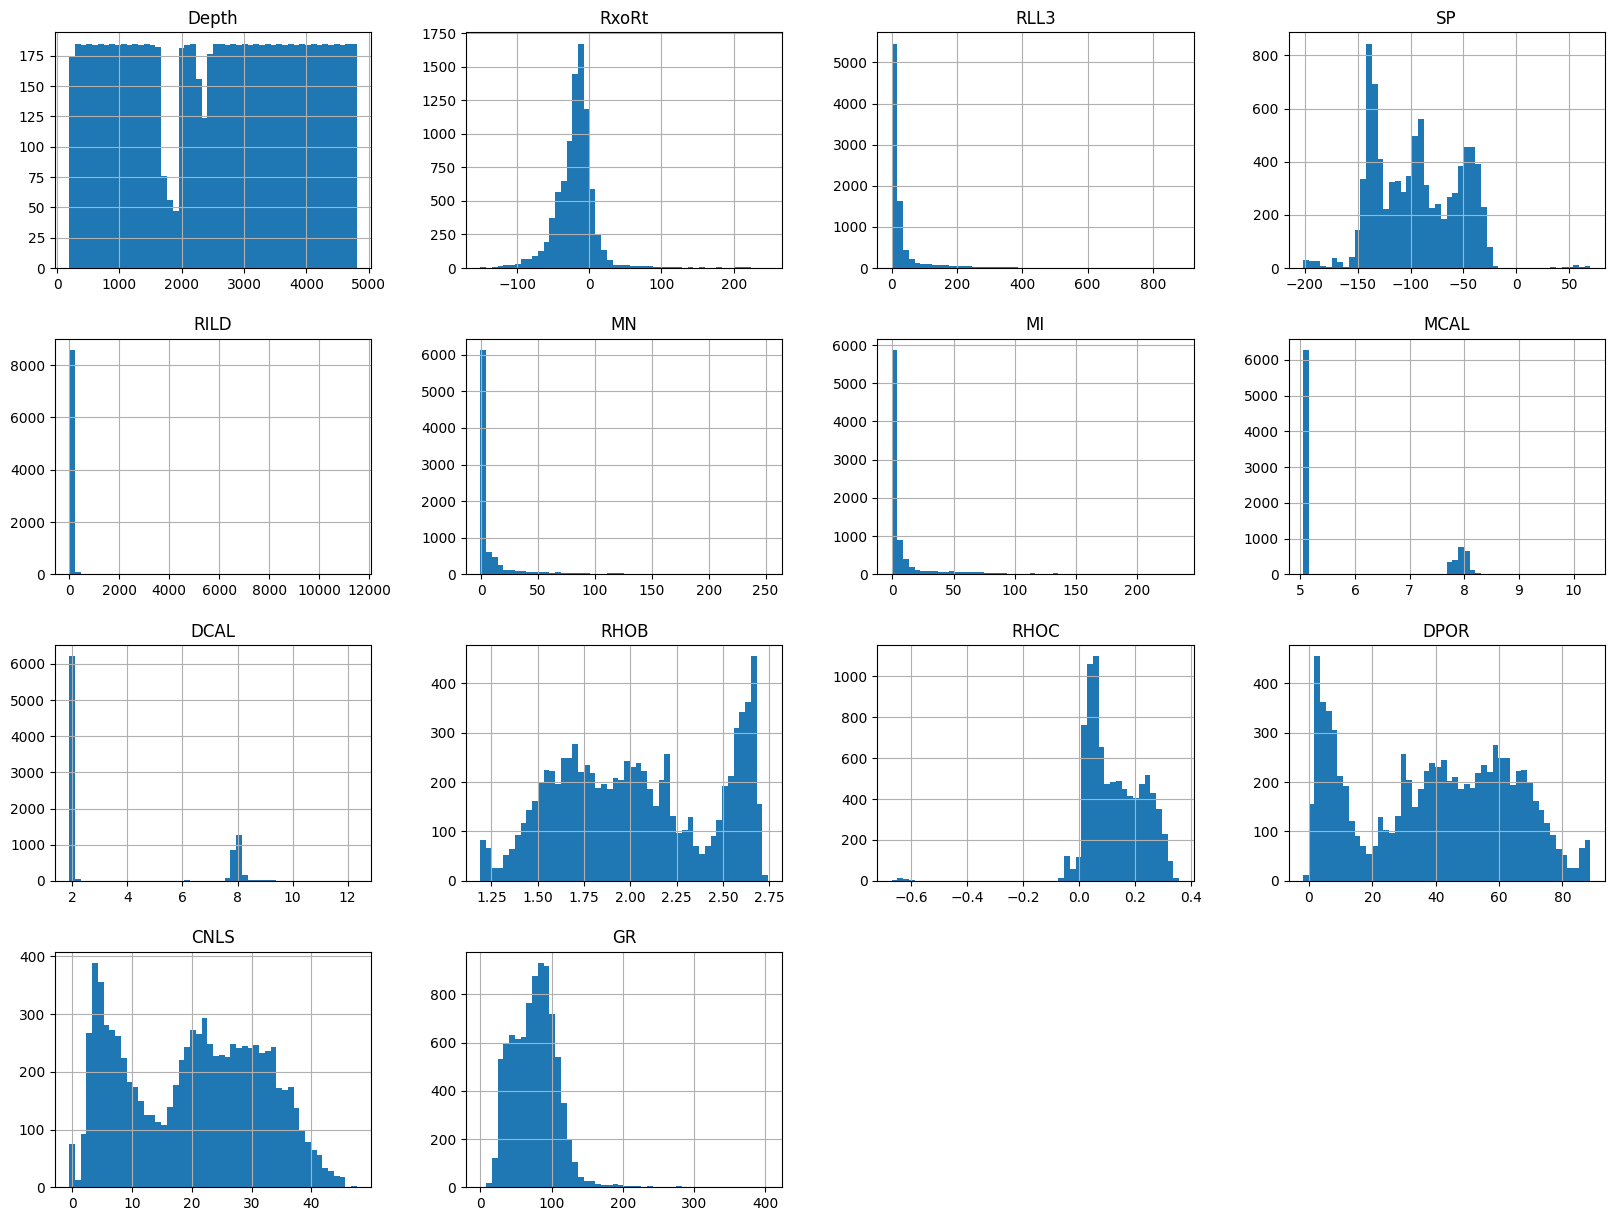

In [5]:
# Plotting the distribution of each feature
df.hist(bins=50, figsize=(20,15))
plt.show()

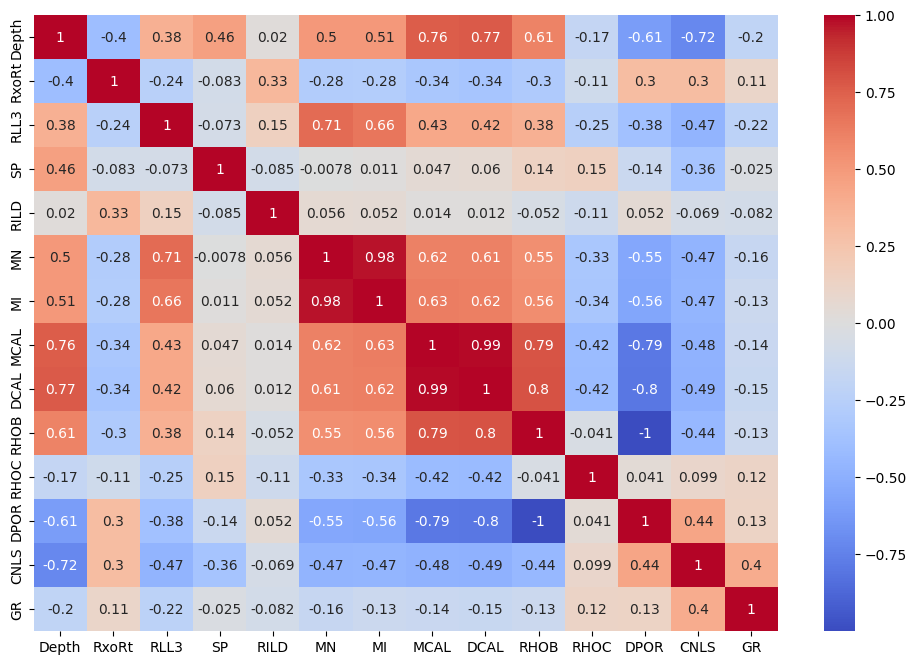

In [7]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

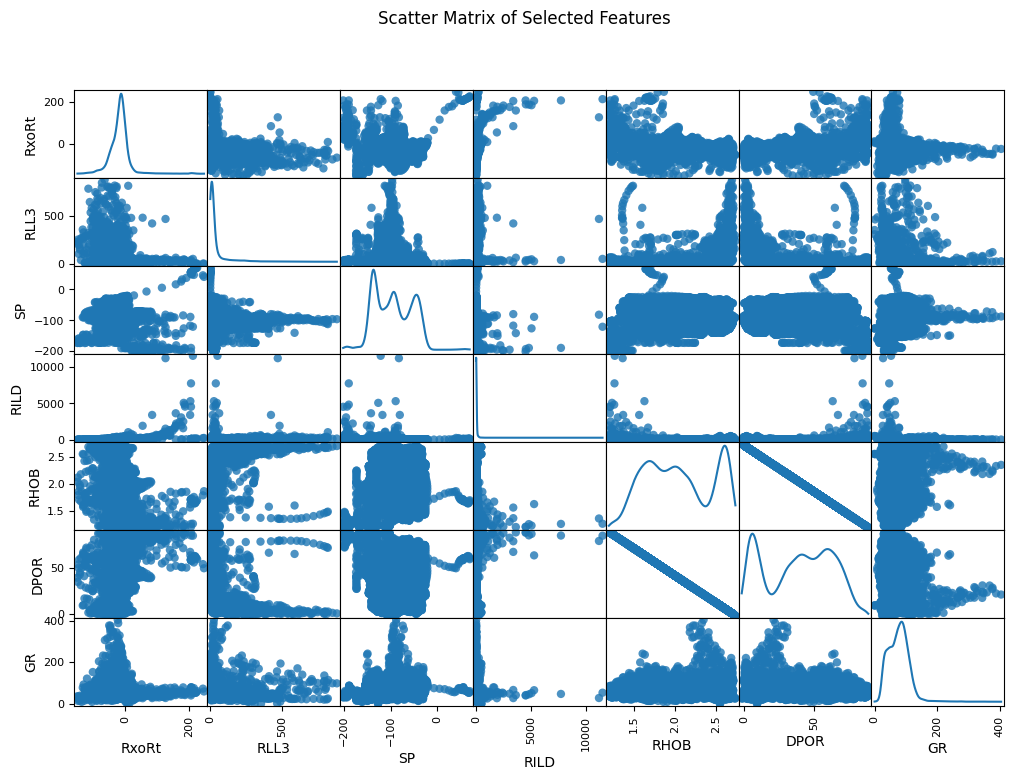

In [20]:
selected_features = ['RxoRt', 'RLL3', 'SP', 'RILD', 'RHOB', 'DPOR', 'GR']

# Scatter matrix plot
scatter_matrix(df[selected_features], figsize=(12, 8), diagonal='kde', marker='o', alpha=0.8)

plt.suptitle('Scatter Matrix of Selected Features')
plt.show()


In [13]:
# Handling missing values (if any) by imputing with median
df.fillna(df.median(), inplace=True)

# Features and Target
X = df.drop(['Depth', 'RHOB'], axis=1)  # Dropping 'Depth' and target variable 'RHOB'
y = df['RHOB']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling using RobustScaler to handle outliers better
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Instantiate the model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')

Linear Regression MSE: 8.230583815751521e-10
Linear Regression R^2 Score: 0.9999999952077259


In [15]:
# Instantiate the model with default parameters
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest MSE: 1.0660278489707039e-07
Random Forest R^2 Score: 0.9999993793031267


### These results are indicative of a model that fits the data extremely well, potentially even too well. The near-zero Mean Squared Error (MSE) and an R² score that is nearly 1 suggest that the Random Forest model has captured almost all the variance in the training data.

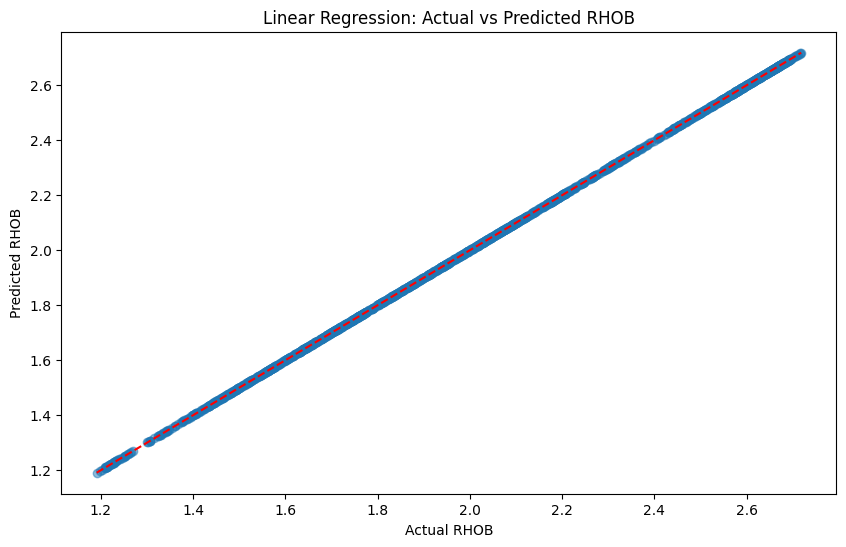

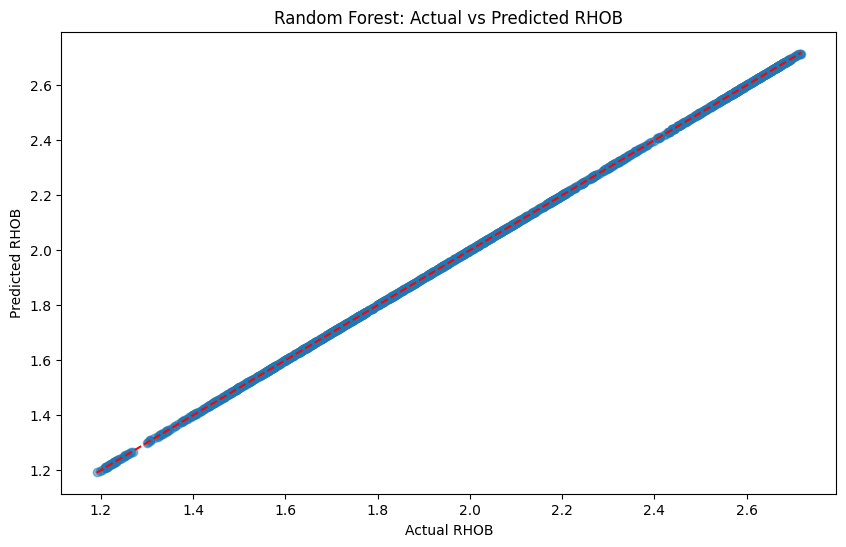

In [18]:
# Function to plot Actual vs Predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual RHOB')
    plt.ylabel('Predicted RHOB')
    plt.title(title)
    plt.show()

# Linear Regression Plot
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression: Actual vs Predicted RHOB')

# Random Forest Plot
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest: Actual vs Predicted RHOB')

In [19]:
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse_rf = -cv_scores_rf.mean()
mean_cv_r2_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='r2').mean()

print(f'Cross-Validated Random Forest MSE: {mean_cv_mse_rf}')
print(f'Cross-Validated Random Forest R^2: {mean_cv_r2_rf}')

Cross-Validated Random Forest MSE: 1.7582684009754395e-07
Cross-Validated Random Forest R^2: 0.9999989855039185


### The cross-validated results for the Random Forest model is still excellent, with a very low Mean Squared Error (MSE) and an R² score very close to 1. This suggests that the model is consistently performing well across different subsets of your data.

### Key Takeaways:
Model Performance:

1.The model is not only fitting the training data well but also generalizing well across different subsets of the data. This suggests that overfitting is not a significant concern here.
Model Robustness:

2.The consistent performance across cross-validation folds indicates that the Random Forest model is robust and reliable for predicting RHOB in this dataset.
Deployment Potential:

3.Given the strong performance, this model could be considered for deployment or further testing in real-world scenarios. It seems well-suited for making predictions on similar datasets.

## Conclusion:
The Random Forest model I built appears to be highly effective for predicting RHOB. Given its excellent performance across both training and cross-validation, it is well-positioned for further application and deployment